In [7]:
import numpy as np
import pandas as pd
import re

df = pd.read_csv('stanford_blueprint_datathon_2019_data.csv')
df.head(n=10)
# df['income'].value_counts()

,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,technology_and_connectivity__owns_apple_products,...,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
0,35-44 years old,Female,New Hampshire,"$45,000 - $49,999",Some High School or Less,medium,0.000000,0.000000,0.057143,0.000000,...,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,Female,Alaska,"$150,000 - $159,999",Graduate School,medium,0.032609,0.032609,0.586957,0.021739,...,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN
2,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
3,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
4,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
5,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
6,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,0.600000,NaN,NaN
7,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
8,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,0.428571,NaN,0.428571,0.428571,NaN,0.857143,NaN,NaN
9,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN


In [16]:
df.loc[:100,['age','gender','services_software_and_online_services__online_dating_paid_users']]

,age,gender,services_software_and_online_services__online_dating_paid_users
0,35-44 years old,Female,0.000000
1,35-44 years old,Female,0.000000
2,18-24 years old,Female,0.000000
3,18-24 years old,Female,0.000000
4,18-24 years old,Female,0.000000
5,18-24 years old,Female,0.000000
6,18-24 years old,Female,0.000000
7,18-24 years old,Female,0.000000
8,18-24 years old,Female,0.000000
9,18-24 years old,Female,0.000000


In [18]:
df_od = df.sort_values(by=['services_software_and_online_services__online_dating_paid_users'], ascending=False)
df_od.loc[:10,['age','gender','services_software_and_online_services__online_dating_paid_users',]]

,age,gender,services_software_and_online_services__online_dating_paid_users
1129551,55-64 years old,Female,0.807692
1129553,55-64 years old,Female,0.807692
1129549,55-64 years old,Female,0.807692
1129550,55-64 years old,Female,0.807692
1129552,55-64 years old,Female,0.807692
1052229,18-24 years old,Male,0.433333
314246,18-24 years old,Female,0.375000
314247,18-24 years old,Female,0.375000
942007,75+ years old,Male,0.333333
942008,75+ years old,Male,0.333333


In [33]:
df_5564 = df_od.loc[df_od['age'] == '55-64 years old']
df_5564.loc[:,['age','gender','services_software_and_online_services__online_dating_paid_users','chlamydia', 'gential_warts', 'gonorrhea', 'herpes', 'hpv', 'other_std', 'parasitic', 'std_screen', 'syphilis', 'trich']]

,age,gender,services_software_and_online_services__online_dating_paid_users,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
1129551,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129553,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129549,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129550,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129552,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
543774,55-64 years old,Female,0.143498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
601248,55-64 years old,Male,0.093750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
601247,55-64 years old,Male,0.093750,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195315,55-64 years old,Male,0.092379,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN
450290,55-64 years old,Female,0.081395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN


In [43]:
df_gn = df.sort_values(by=['gonorrhea'], ascending=False)
df_gn.loc[:10,['age','gender','state','income','education','gonorrhea','date']]

,age,gender,state,income,education,gonorrhea,date
72064,75+ years old,Female,New Jersey,"$125,000 - $129,999",High School,4.400000,2016-10-01
565410,55-64 years old,Female,Oklahoma,"$180,000 - $189,999",Graduate School,4.000000,2016-01-01
1220703,65-74 years old,Female,Wyoming,"$55,000 - $59,999",High School,3.600000,2016-07-01
855997,35-44 years old,Male,Missouri,"$120,000 - $124,999",High School,3.600000,2016-07-01
423854,25-34 years old,Female,New York,"$115,000 - $119,999",Graduate School,3.200000,2015-07-01
892888,75+ years old,Male,Maine,"Less than $14,999",High School,3.000000,2015-10-01
802393,65-74 years old,Female,Vermont,"$180,000 - $189,999",College,2.800000,2017-01-01
359412,18-24 years old,Female,California,"$85,000 - $89,999",High School,2.727273,2018-01-01
751323,45-54 years old,Female,Minnesota,"$70,000 - $74,999",Graduate School,2.600000,2017-10-01
1109568,18-24 years old,Male,Florida,"$120,000 - $124,999",Some College,2.600000,2014-07-01


In [47]:
df_1824f = df.loc[df['age'] == '18-24 years old']
df_1824f = df_1824f.loc[df['gender'] == 'Female']
df_1824f.loc[:,['age','gender','date','chlamydia', 'gential_warts', 'gonorrhea', 'herpes', 'hpv', 'other_std', 'parasitic', 'std_screen', 'syphilis', 'trich']]

,age,gender,date,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
2,18-24 years old,Female,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
3,18-24 years old,Female,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
4,18-24 years old,Female,2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
5,18-24 years old,Female,2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
6,18-24 years old,Female,2017-10-01,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,0.600000,NaN,NaN
7,18-24 years old,Female,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
8,18-24 years old,Female,2016-01-01,NaN,NaN,0.428571,NaN,0.428571,0.428571,NaN,0.857143,NaN,NaN
9,18-24 years old,Female,2015-07-01,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
10,18-24 years old,Female,2014-10-01,0.6,NaN,0.600000,NaN,NaN,NaN,NaN,0.800000,NaN,NaN
11,18-24 years old,Female,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,0.6,1.600000,NaN,NaN


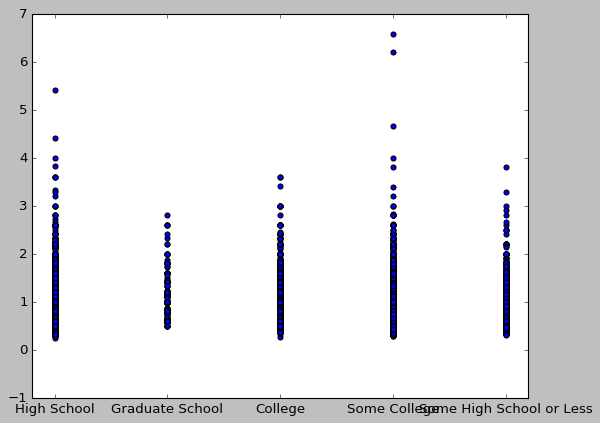

In [129]:
import matplotlib.pyplot as plt
x = df_1824f['education']
y = df_1824f['std_screen']
#z = df_1824f['syphilis']
plt.scatter(x,y)

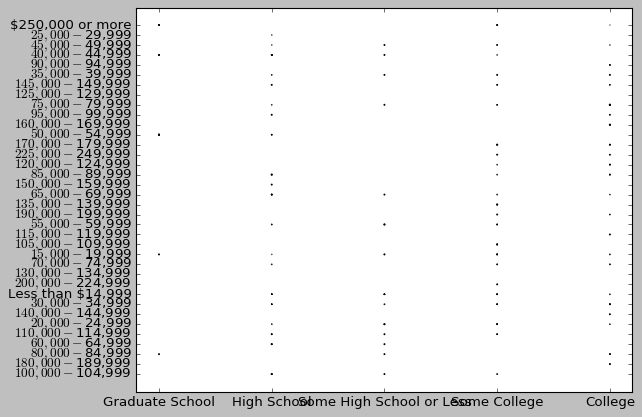

In [103]:
df_75f = df.loc[df['age'] == '75+ years old']
df_75f = df_75f.loc[df['gender'] == 'Female']
df_75fny = df_75f.loc[df['state'] == 'New York']
x = df_75fny['education']
y = df_75fny['income']
z = df_75fny['chlamydia']
plt.scatter(x,y,s=z)

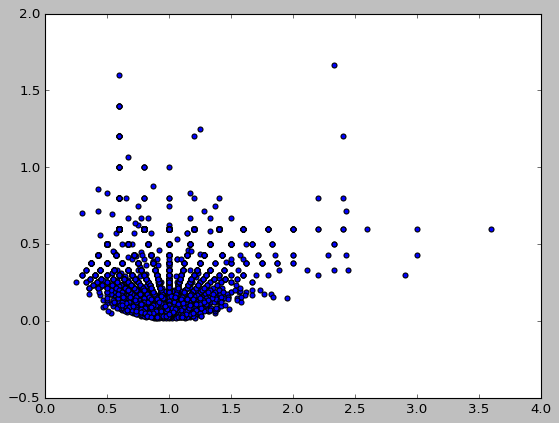

In [133]:
df_2534f = df.loc[df['age'] == '25-34 years old']
df_2534f = df_2534f.loc[df['gender'] == 'Female']
x = df_1824f['std_screen']
y = df_1824f['chlamydia']
#z = df_1824f['syphilis']
plt.scatter(x,y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

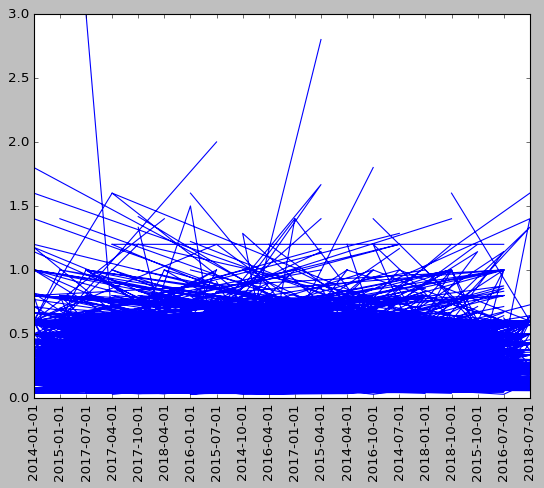

In [145]:
df_1824fnew = df_1824f.copy(deep = True)
pd.to_datetime(df_1824fnew['date'])
df_1824fnew[['date','hpv']].head(n=20)
plt.plot(df_1824fnew['date'], df_1824fnew['hpv'])
plt.xticks(rotation='vertical')
#df_1824fnew.replace({'date': r'^ba.$'}, {'A': 'new'}, regex=True)

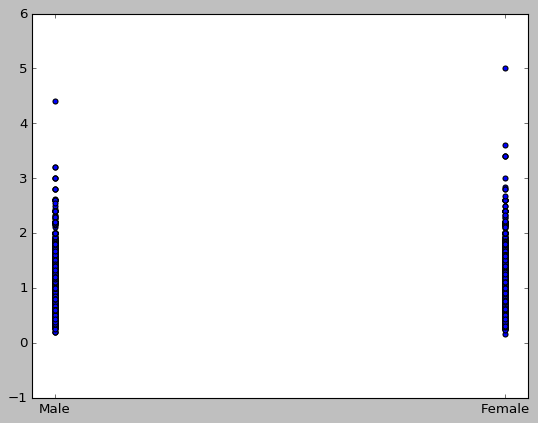

In [147]:
dfLA = df.loc[df['state'] == 'Louisiana']
plt.scatter(dfLA['gender'], dfLA['std_screen'])

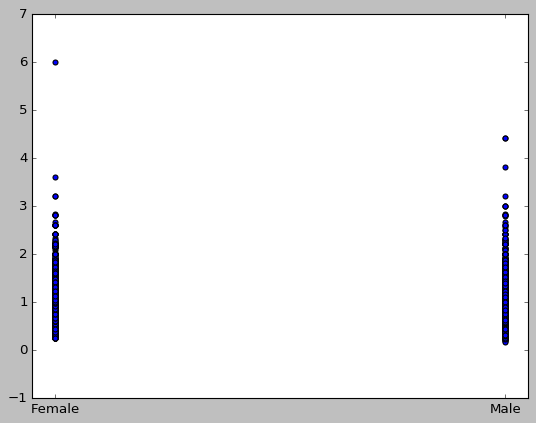

In [149]:
dfTX = df.loc[df['state'] == 'Texas']
plt.scatter(dfTX['gender'], dfTX['std_screen'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

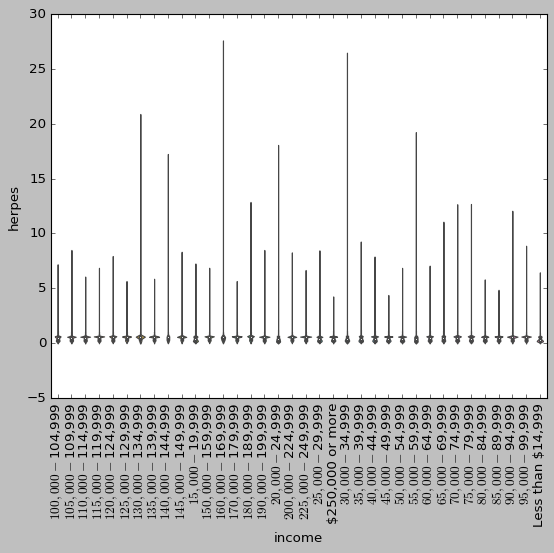

In [166]:
import seaborn as sns
dfFL = df.loc[df['state'] == 'Florida']
dfFL = df.sort_values(by=['income'], ascending=True)
sns.violinplot(dfFL['income'], dfFL['herpes'])
plt.xticks(rotation='vertical')

In [248]:
import re
dfTX = df.loc[df['state'] == 'Texas']

In [249]:
search = []
for values in dfTX['income']:
    items = re.findall(r'\$(\w+)\,', values)
    search.append(int(items[0]))
dfTX['incomenum'] = search # create new column with values in search
#dfTX.sort_values(by='incomenum')
#dfTX[['age','income','incomenum']]

/Users/yemloo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [250]:
dfTXsort = dfTX.sort_values(by='incomenum', ascending = True)
dfTXsort[['age','income','incomenum']]

,age,income,incomenum
453363,25-34 years old,"Less than $14,999",14
1215314,75+ years old,"Less than $14,999",14
1215313,75+ years old,"Less than $14,999",14
1215312,75+ years old,"Less than $14,999",14
1215311,75+ years old,"Less than $14,999",14
1215310,75+ years old,"Less than $14,999",14
1215309,75+ years old,"Less than $14,999",14
1215308,75+ years old,"Less than $14,999",14
1215307,75+ years old,"Less than $14,999",14
1215306,75+ years old,"Less than $14,999",14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

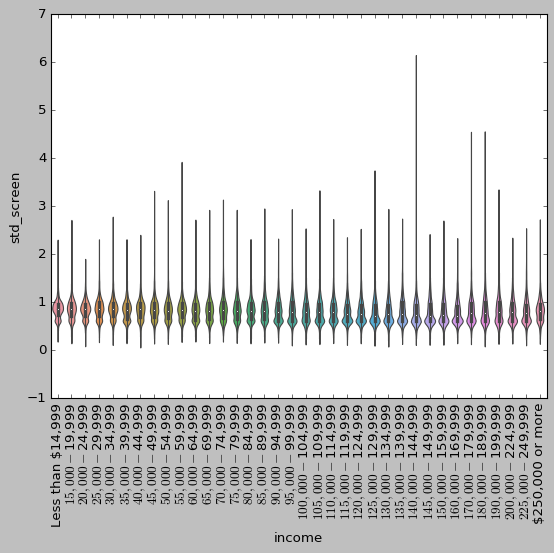

In [251]:
sns.violinplot(dfTXsort['income'], dfTXsort['std_screen'])
plt.xticks(rotation='vertical')

In [6]:
#ages = ['65 - 74 years old', '75+ years old']
dfCAold = df.loc[df['age'] == '65-74 years old']
dfCAold2 = df.loc[df['age'] == '75+ years old']
dfCAold = dfCAold.append(dfCAold2)
dfCAold = dfCAold.loc[dfCAold['state'] == 'California']
#dfCAold.to_csv('oldpplCA.csv')

NameError: name 'df' is not defined

In [3]:
import numpy as np
import pandas as pd
import re

dfCAold = pd.read_csv('oldpplCA.csv')
search = []
for values in dfCAold['income']:
    items = re.findall(r'\$(\w+)\,', values)
    search.append(int(items[0]))
dfCAold['incomenum'] = search # create new column with values in search
dfCAold = dfCAold.sort_values(by='incomenum')
dfCAold
#dfTX[['age','income','incomenum']]

,Unnamed: 0,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,...,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich,incomenum
8535,342655,75+ years old,Male,California,"Less than $14,999",High School,low,0.039092,0.031186,0.090619,...,NaN,NaN,0.294118,0.088235,0.117647,0.088235,1.029412,0.088235,NaN,14
9891,579904,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.600000,NaN,14
9890,579903,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,NaN,NaN,NaN,0.600000,NaN,NaN,14
9889,579902,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,0.600000,NaN,NaN,0.600000,NaN,NaN,14
9888,579901,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,NaN,NaN,NaN,0.600000,1.200000,NaN,14
9887,579900,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,NaN,NaN,NaN,0.600000,NaN,NaN,14
12453,1142954,75+ years old,Male,California,"Less than $14,999",Some College,low,0.037417,0.028037,0.073061,...,NaN,NaN,0.250000,0.250000,NaN,0.250000,0.583333,NaN,NaN,14
12454,1142955,75+ years old,Male,California,"Less than $14,999",Some College,low,0.037417,0.028037,0.073061,...,NaN,NaN,0.272727,0.272727,NaN,NaN,1.181818,NaN,0.272727,14
12455,1142956,75+ years old,Male,California,"Less than $14,999",Some College,low,0.037417,0.028037,0.073061,...,NaN,0.600000,0.600000,0.600000,0.600000,NaN,0.600000,NaN,NaN,14
12456,1142957,75+ years old,Male,California,"Less than $14,999",Some College,low,0.037417,0.028037,0.073061,...,NaN,NaN,0.434783,0.130435,0.130435,0.217391,0.217391,NaN,NaN,14


<Figure size 432x288 with 0 Axes>

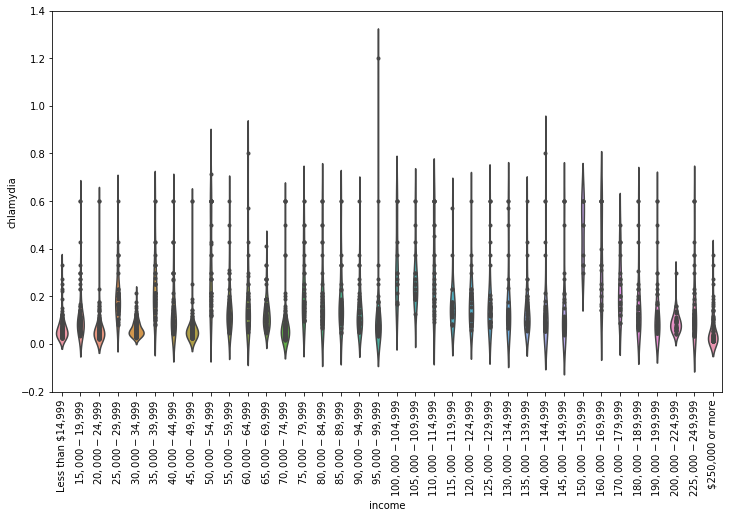

<Figure size 432x288 with 0 Axes>

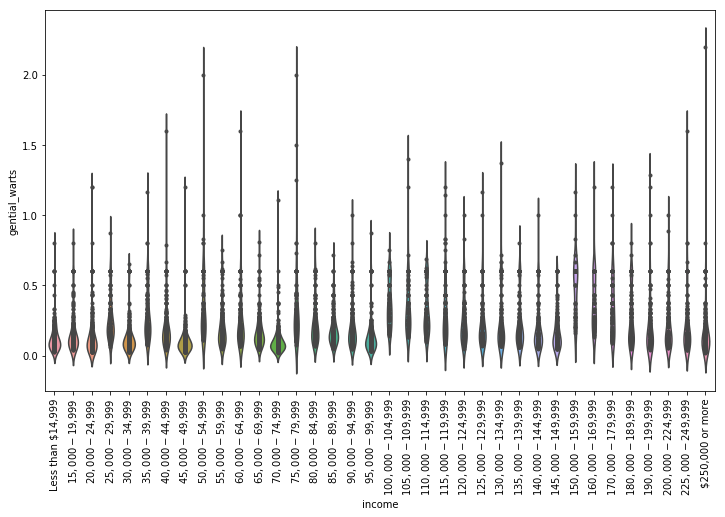

<Figure size 432x288 with 0 Axes>

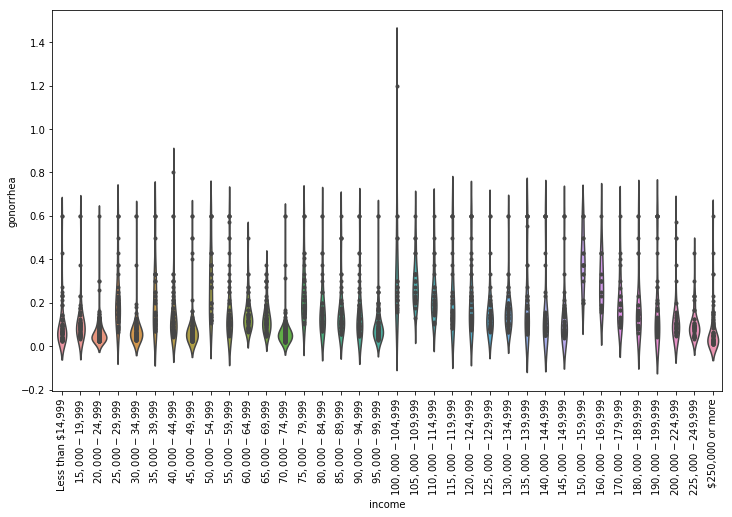

<Figure size 432x288 with 0 Axes>

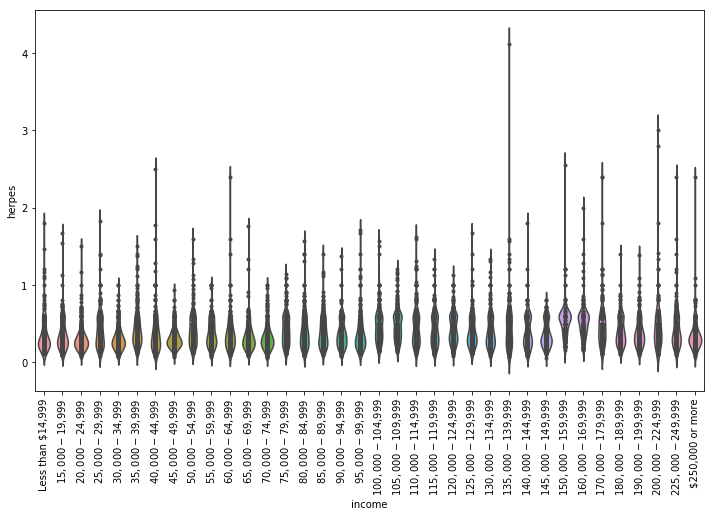

<Figure size 432x288 with 0 Axes>

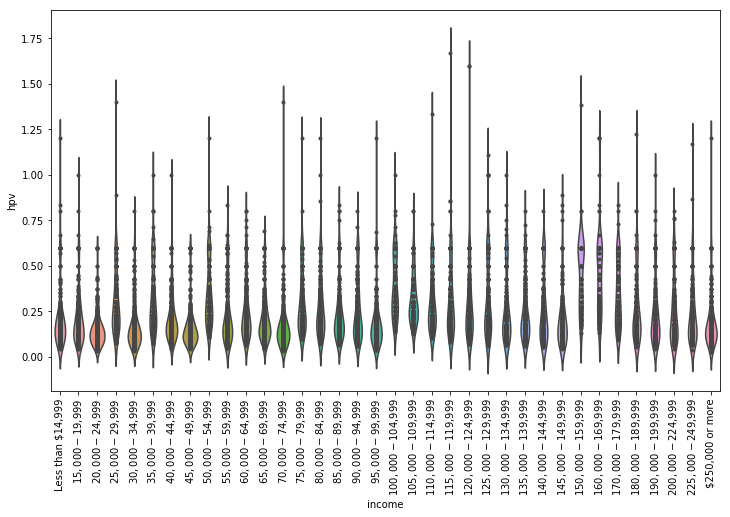

<Figure size 432x288 with 0 Axes>

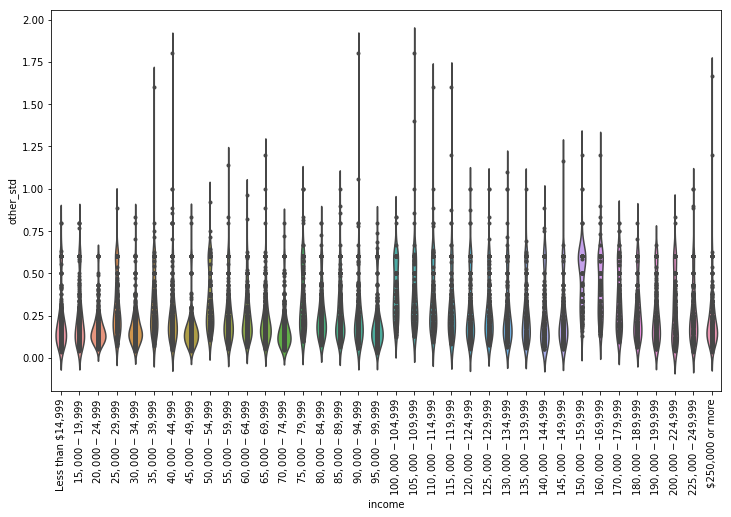

<Figure size 432x288 with 0 Axes>

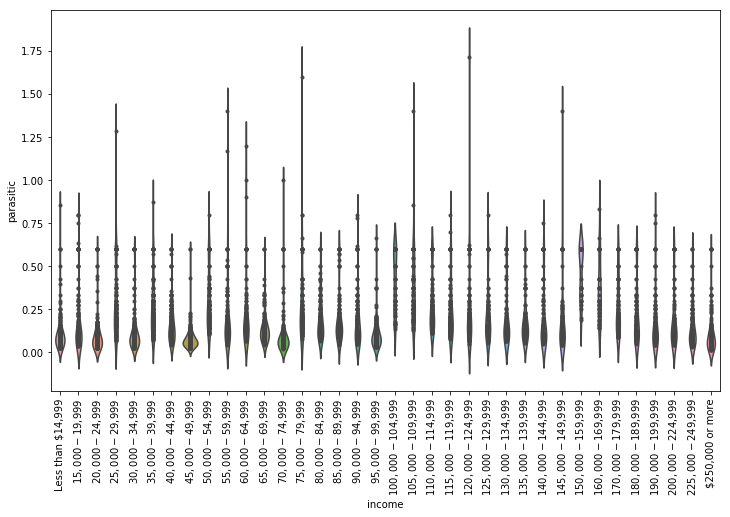

<Figure size 432x288 with 0 Axes>

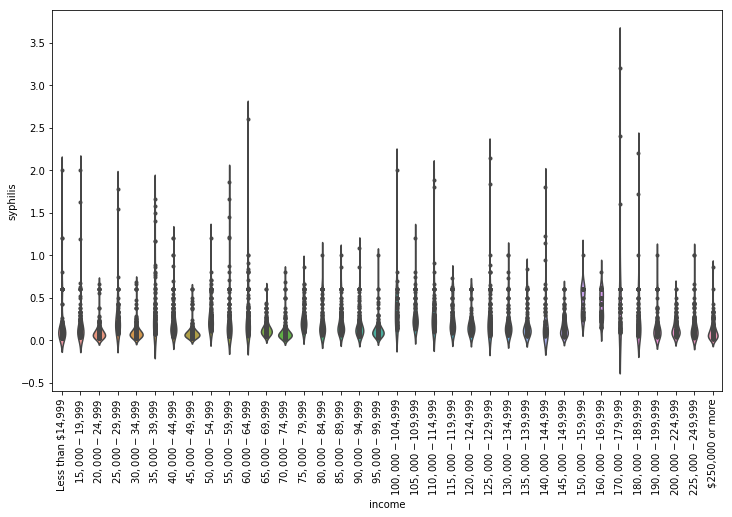

<Figure size 432x288 with 0 Axes>

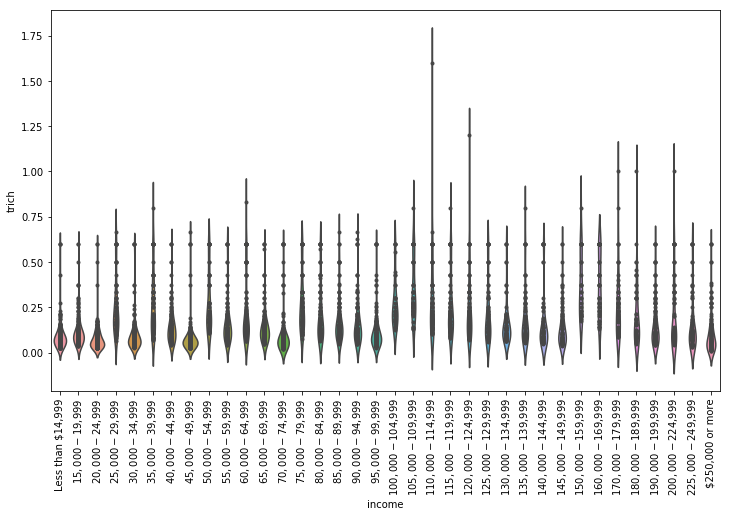

In [4]:
from matplotlib.pyplot import figure
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich']

for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold['income'], dfCAold[i], inner = "point")
    plt.xticks(rotation='vertical')
    #filename = i + '.pdf'
    #plt.savefig(filename, bbox_inches='tight')


In [5]:
educorder = {'Some High School or Less':1, 'High School':2, 'Some College':3, 'College':4, 'Graduate School':5}
dfCAold_educsort = dfCAold.copy(deep = True)
#dfCAold_educsort
dfCAold_educsort['education'].replace(educorder, inplace = True)
dfCAold_educsort = dfCAold_educsort.sort_values(by = 'education', ascending = True)

<Figure size 432x288 with 0 Axes>

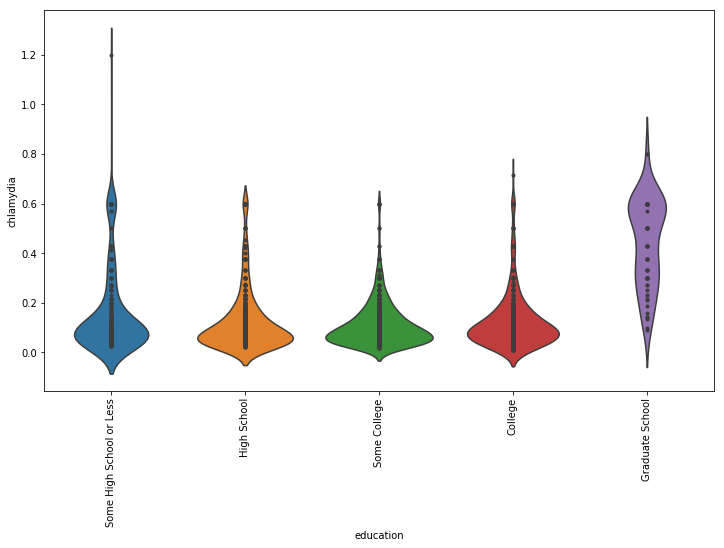

<Figure size 432x288 with 0 Axes>

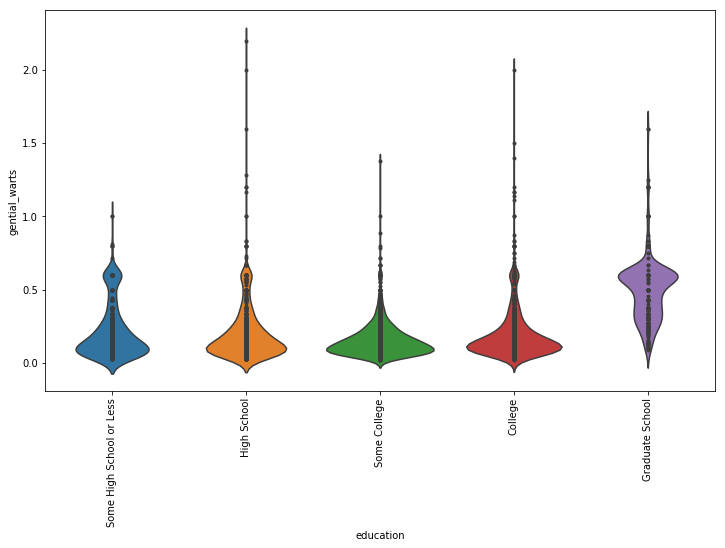

<Figure size 432x288 with 0 Axes>

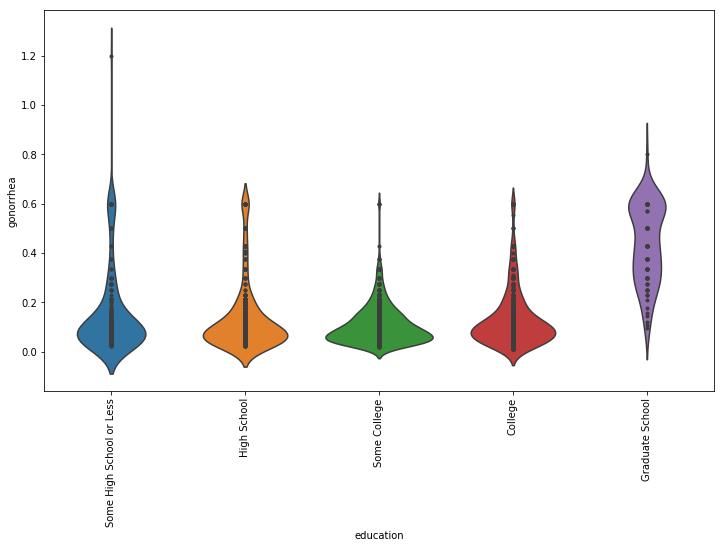

<Figure size 432x288 with 0 Axes>

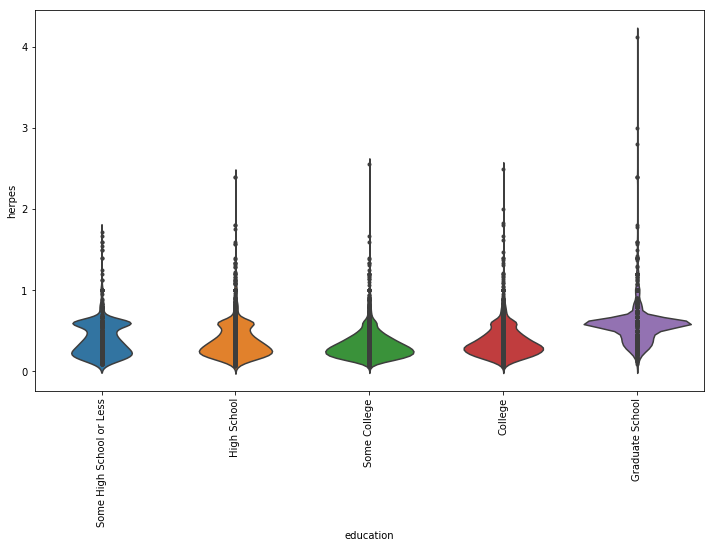

<Figure size 432x288 with 0 Axes>

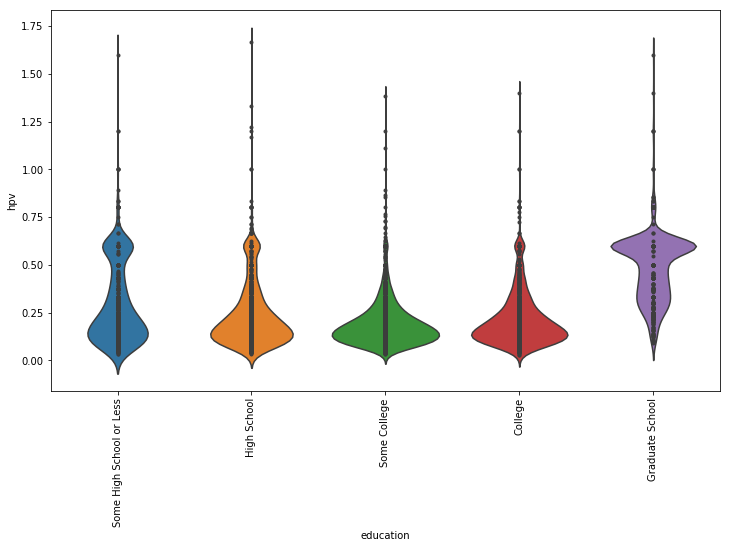

<Figure size 432x288 with 0 Axes>

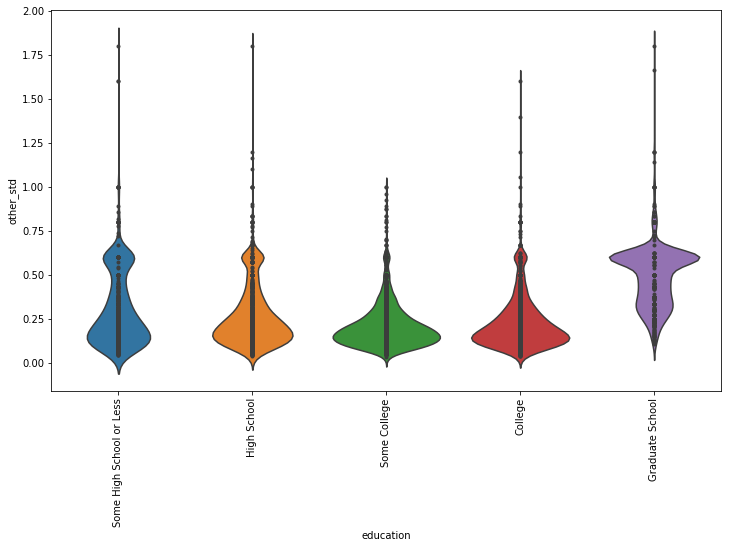

<Figure size 432x288 with 0 Axes>

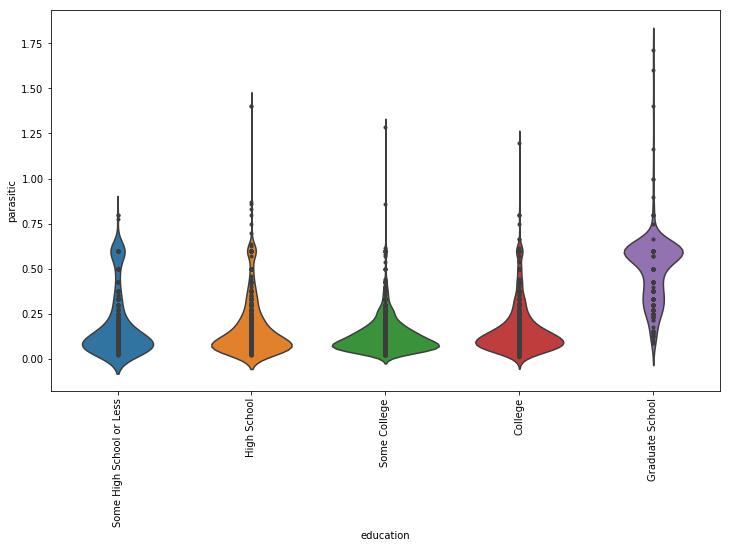

<Figure size 432x288 with 0 Axes>

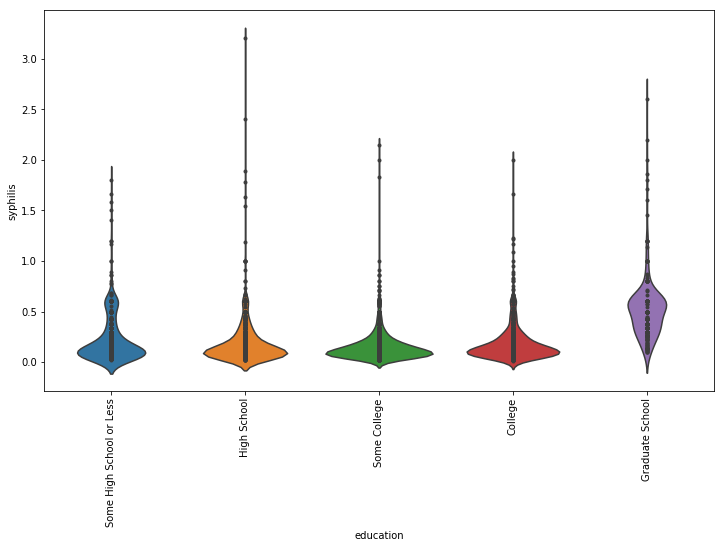

<Figure size 432x288 with 0 Axes>

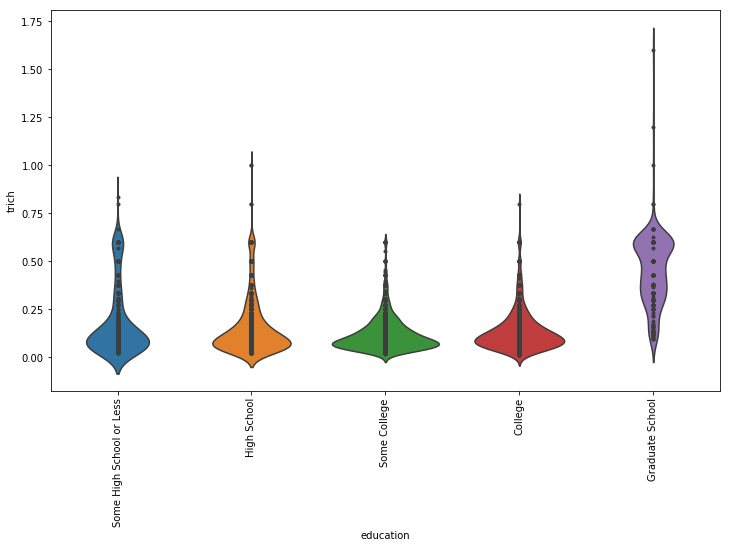

In [6]:
xaxis = 'education'
axislabels = ['Some High School or Less', 'High School', 'Some College', 'College', 'Graduate School']
for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold_educsort[xaxis], dfCAold_educsort[i], inner = "point", )
    plt.xticks(rotation='vertical')
    plt.xticks([0,1,2,3,4], axislabels)
    #ax = dfCAold.set_index("education").loc[educorder]
    #filename = i + '_' + xaxis + '.pdf'
    #plt.savefig(filename, bbox_inches='tight')

In [344]:
dfCAold.loc[dfCAold['education'] == "Graduate School"]

,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,technology_and_connectivity__owns_apple_products,...,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
14919,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,0.600000,0.600000,NaN,NaN,NaN,NaN,NaN
14920,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
14921,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
14922,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,0.600000,NaN,NaN
14923,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14924,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN
14925,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
14926,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
14927,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
14928,65-74 years old,Male,California,"$50,000 - $54,999",Graduate School,low,0.039268,0.026687,0.286440,0.042699,...,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich','std_screen']

dfCAold_educsort = dfCAold_educsort.sort_values(by='education', ascending = True)
educnum = list(dfCAold_educsort['education'])
incomenums = list(dfCAold_educsort['incomenum'])
#educnum

<Figure size 432x288 with 0 Axes>

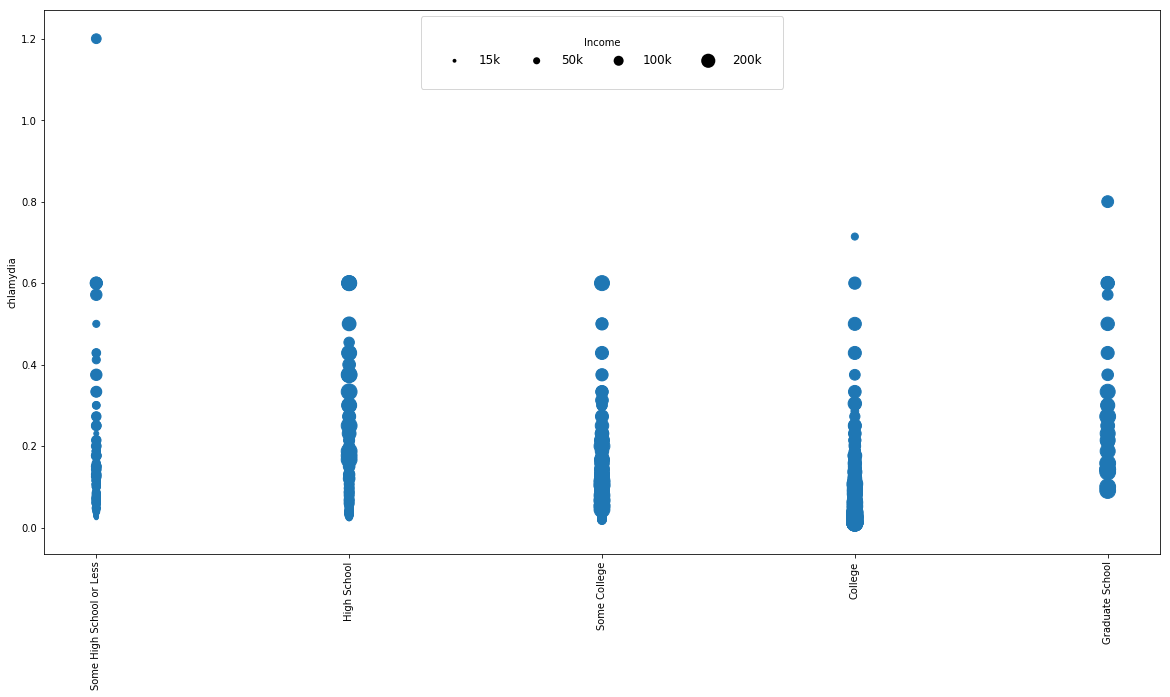

<Figure size 432x288 with 0 Axes>

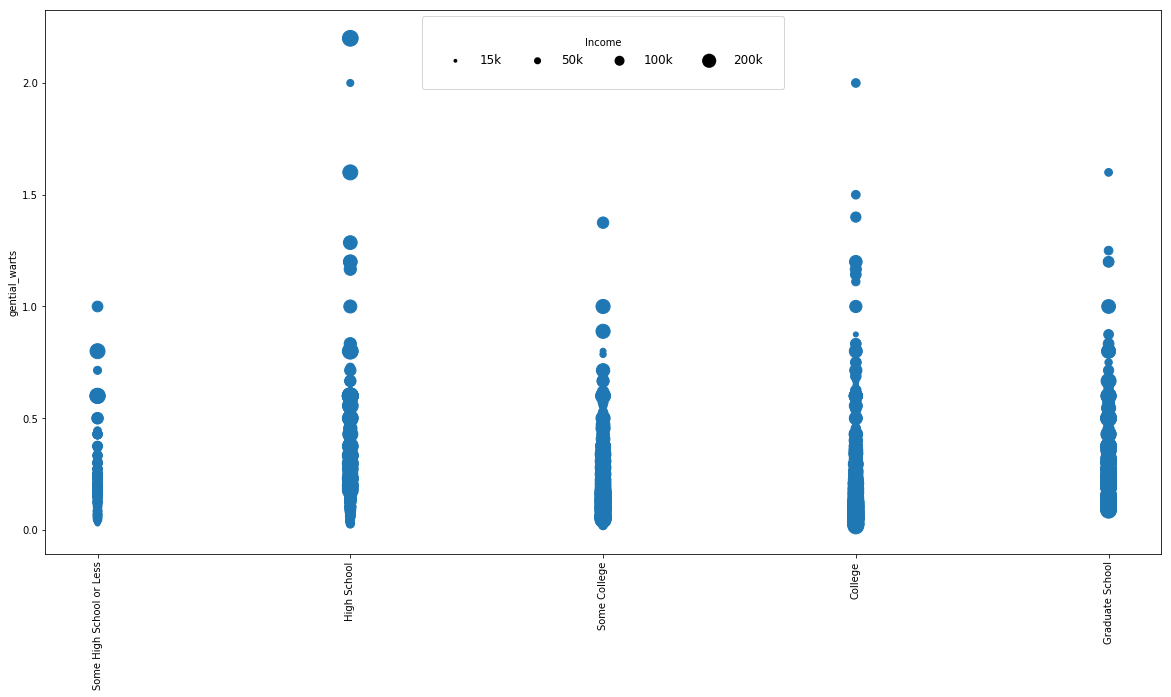

<Figure size 432x288 with 0 Axes>

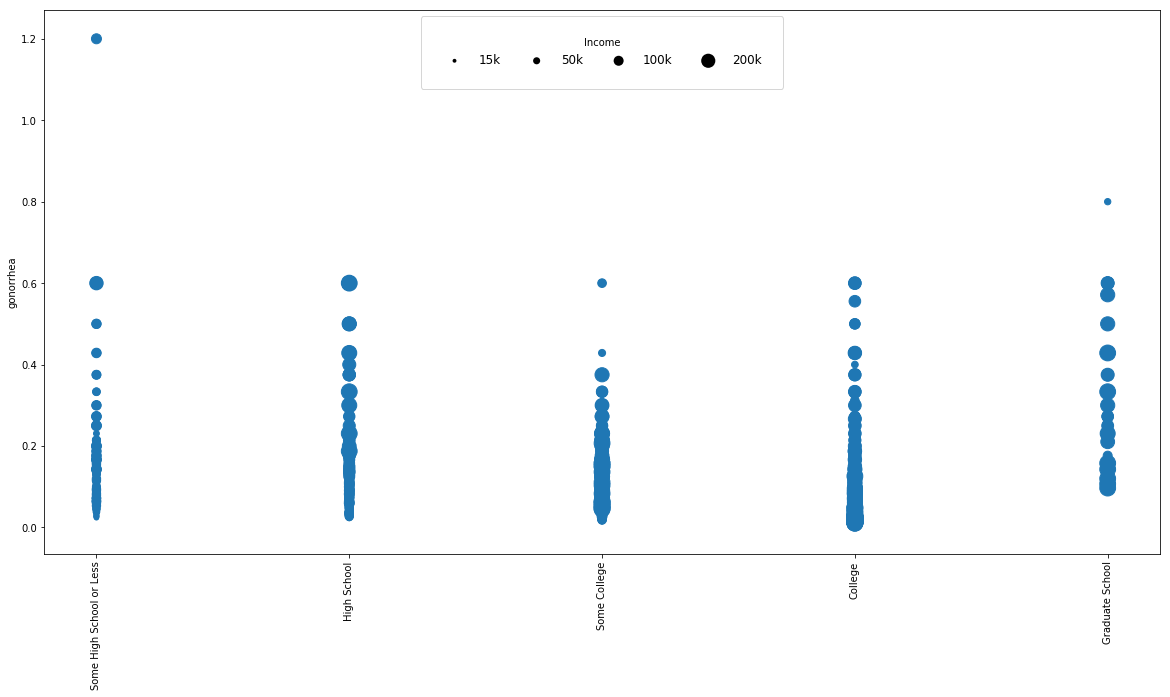

<Figure size 432x288 with 0 Axes>

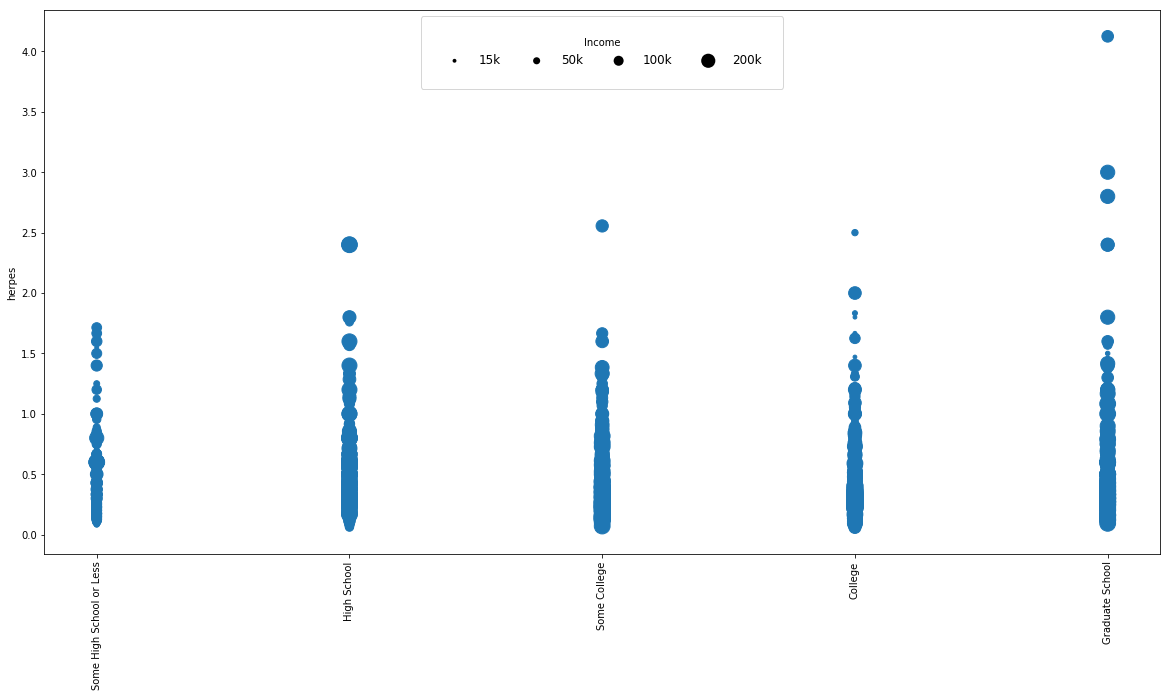

<Figure size 432x288 with 0 Axes>

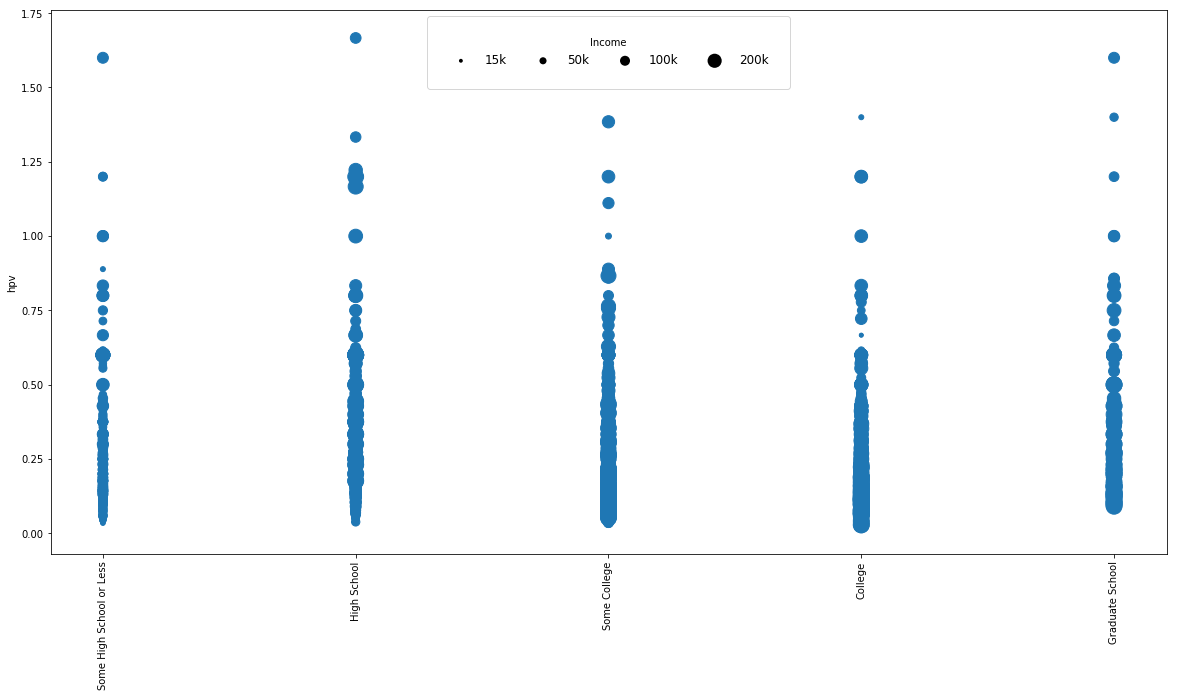

<Figure size 432x288 with 0 Axes>

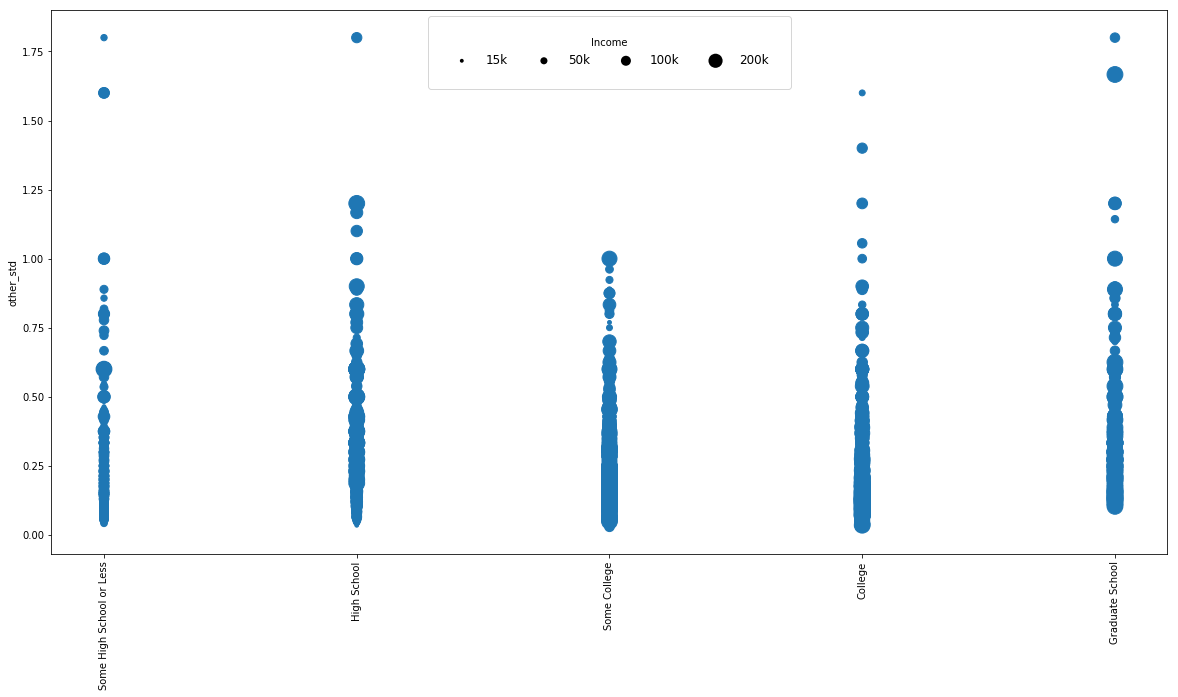

<Figure size 432x288 with 0 Axes>

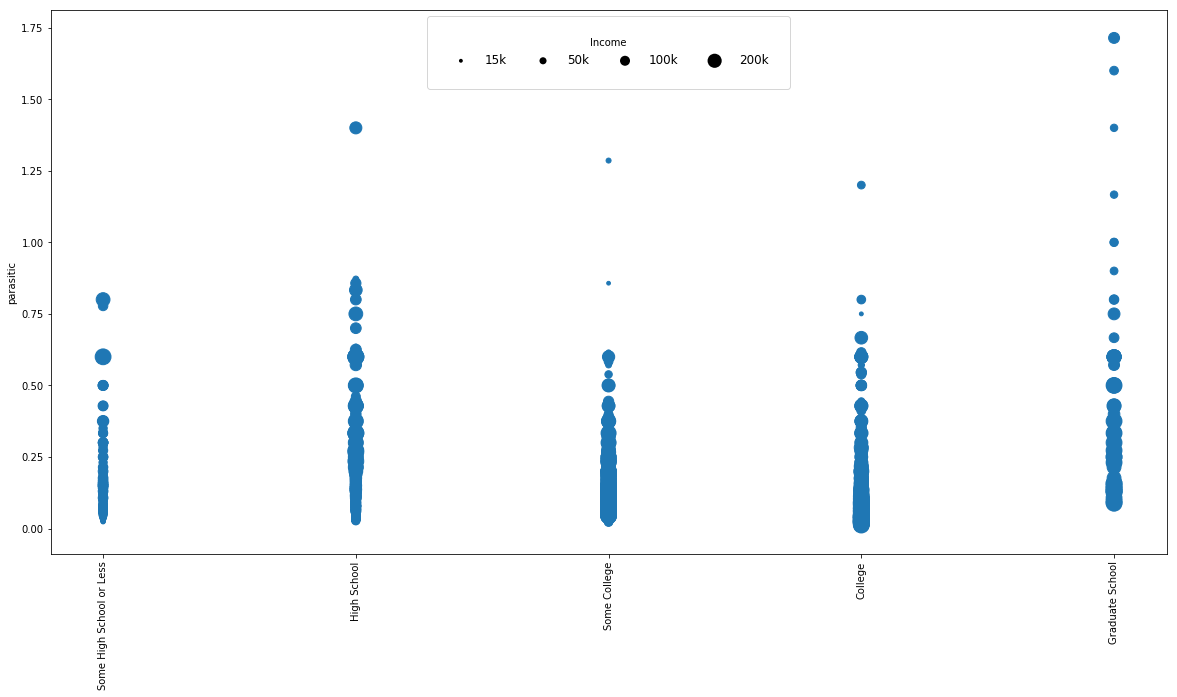

<Figure size 432x288 with 0 Axes>

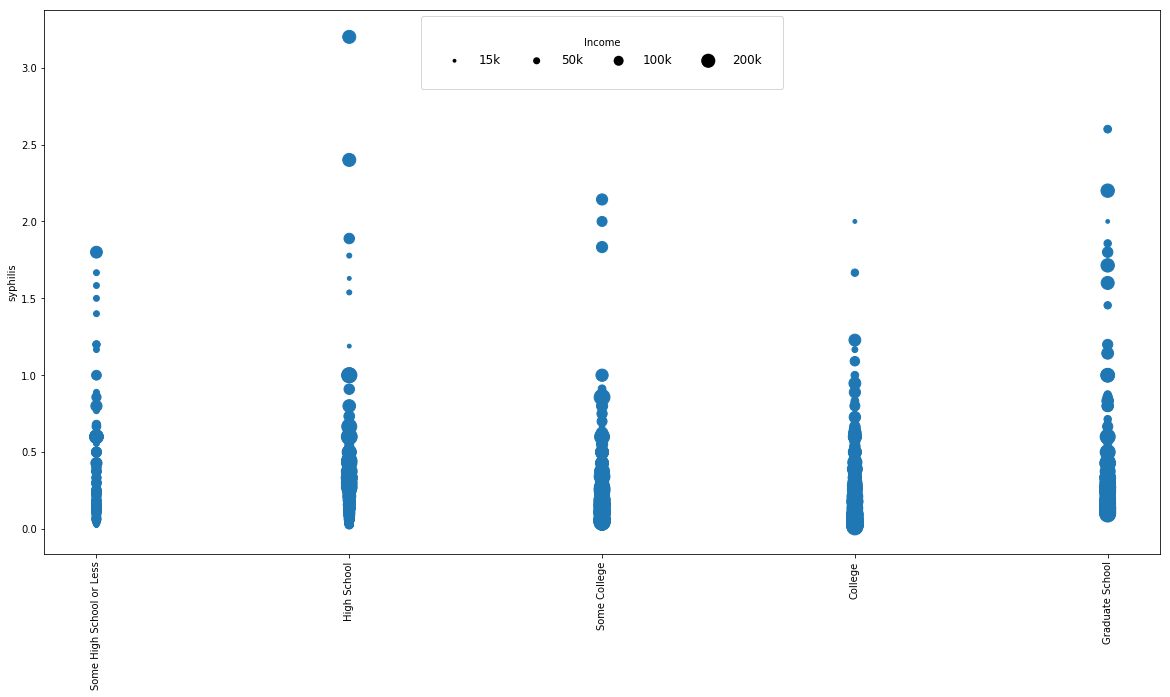

<Figure size 432x288 with 0 Axes>

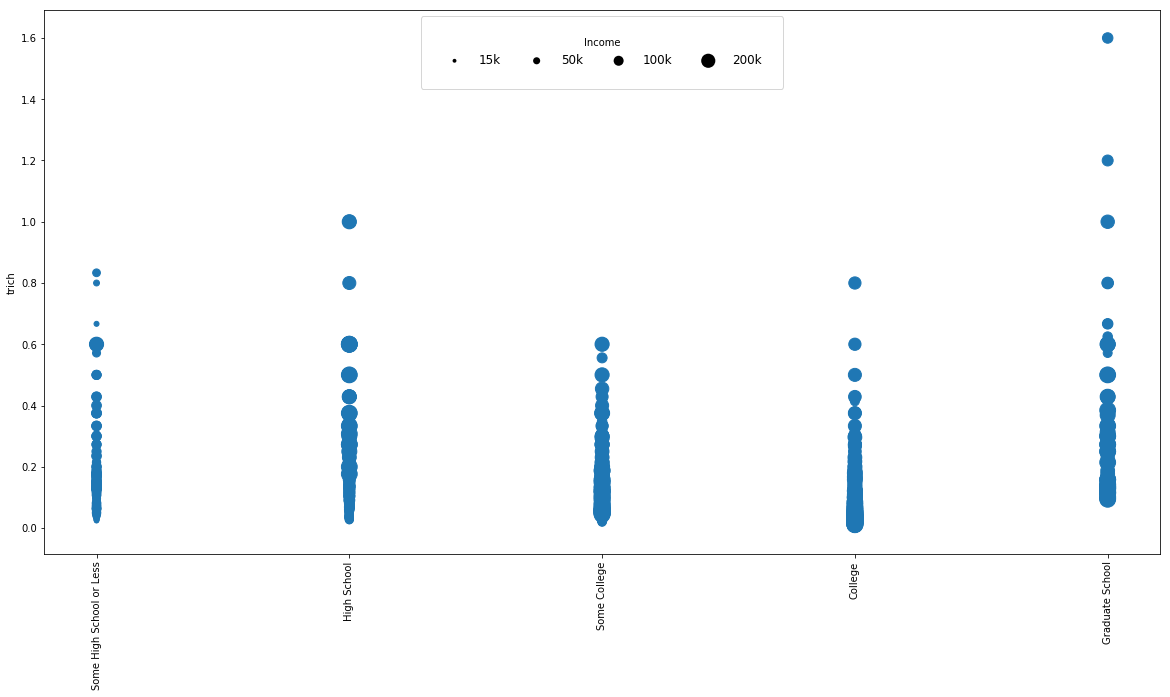

In [9]:
xaxis = 'education'
axislabels = ['Some High School or Less', 'High School', 'Some College', 'College', 'Graduate School']

for i in std_list:
    plt.figure()
    figure(figsize=(20, 10), facecolor='w')
    plt.scatter(dfCAold_educsort[xaxis], dfCAold_educsort[i], s=[i for i in incomenums])
    plt.xticks(rotation='vertical')
    plt.ylabel(i)
    plt.xticks([1,2,3,4,5], axislabels)
    #ax = dfCAold.set_index("education").loc[educorder]
    l1 = plt.scatter([],[], s=15, c = 'black', edgecolors='none')
    l2 = plt.scatter([],[], s=50, c = 'black', edgecolors='none')
    l3 = plt.scatter([],[], s=100, c = 'black', edgecolors='none')
    l4 = plt.scatter([],[], s=200, c = 'black', edgecolors='none')
    labels = ["15k", "50k", "100k", "200k"]
    leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
                     handlelength=2, loc = 9, borderpad = 1.8,
                     handletextpad=1, title='Income', scatterpoints = 1)
    filename = i + '_scatter_' + xaxis + '.pdf'
    plt.savefig(filename, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

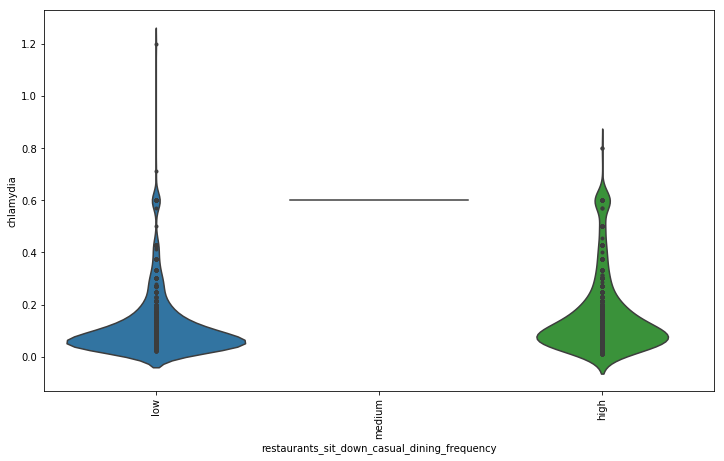

<Figure size 432x288 with 0 Axes>

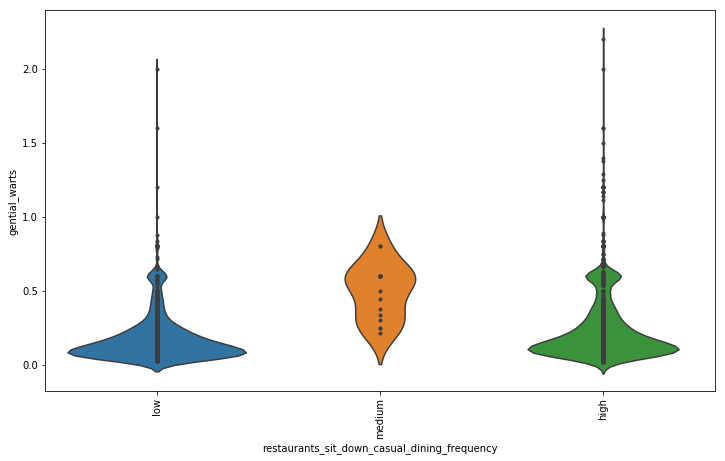

<Figure size 432x288 with 0 Axes>

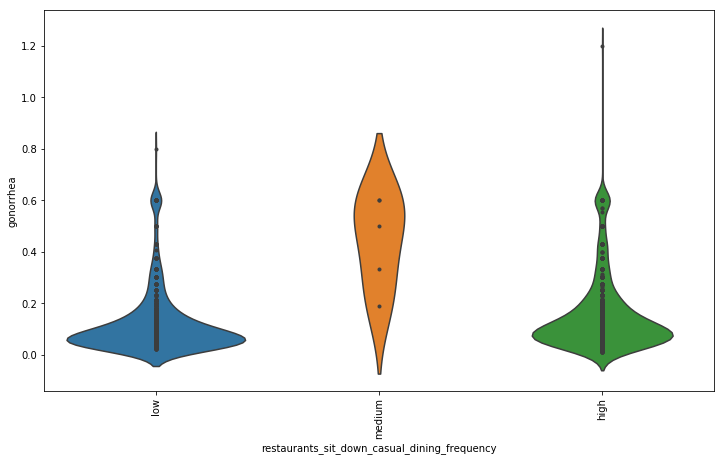

<Figure size 432x288 with 0 Axes>

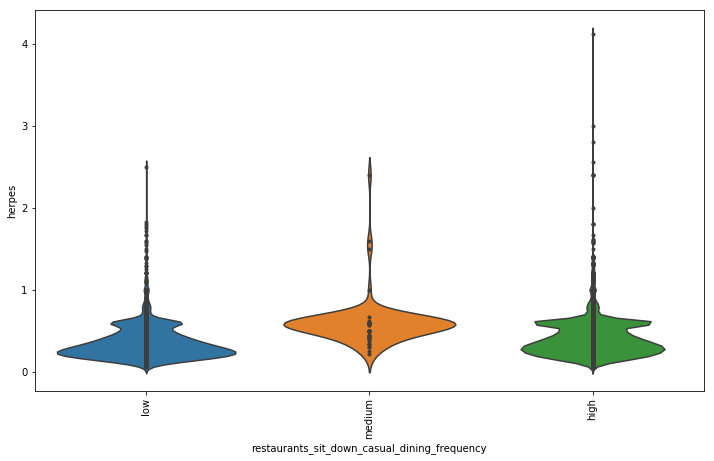

<Figure size 432x288 with 0 Axes>

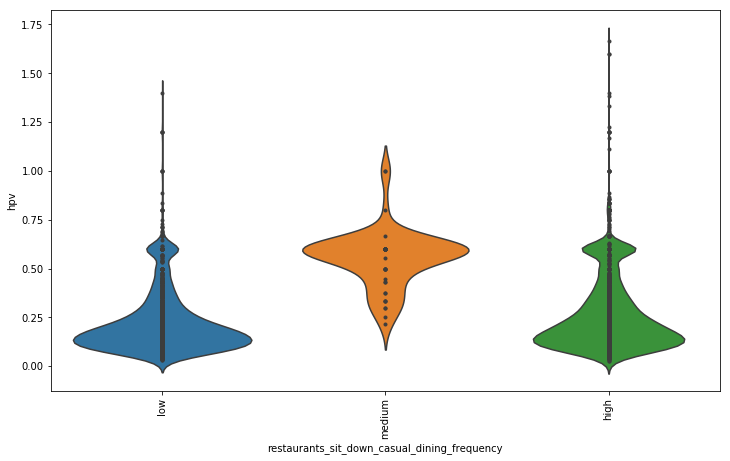

<Figure size 432x288 with 0 Axes>

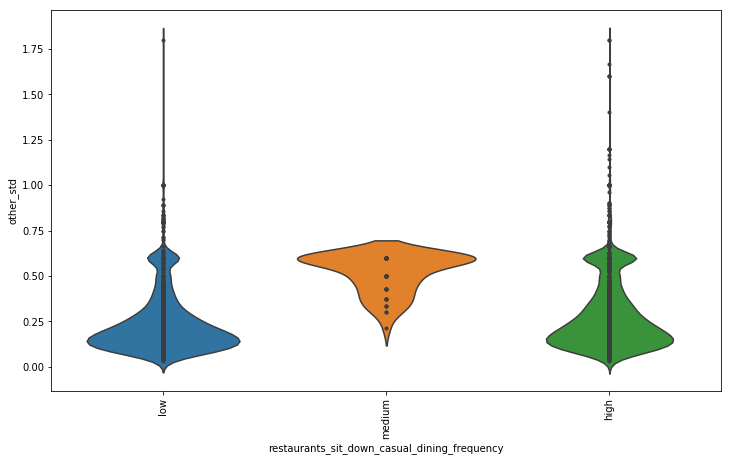

<Figure size 432x288 with 0 Axes>

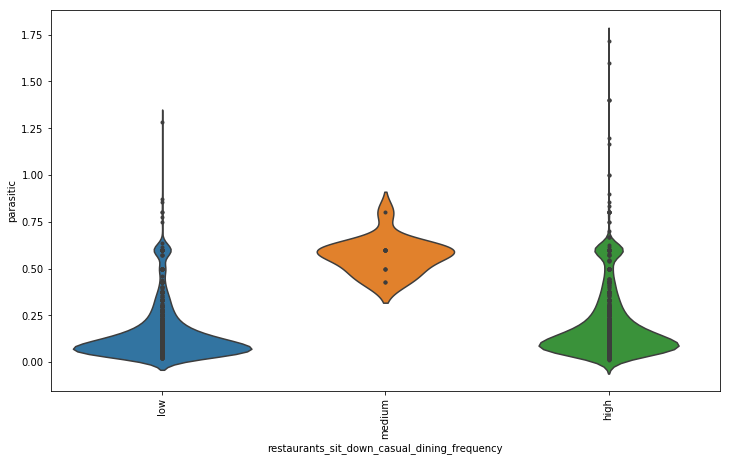

<Figure size 432x288 with 0 Axes>

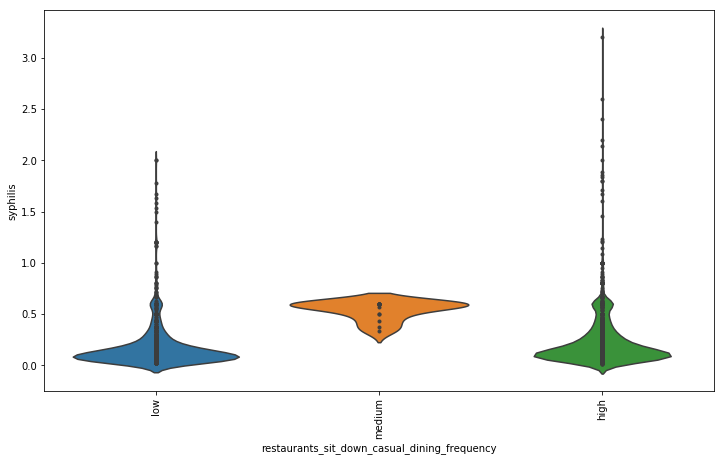

<Figure size 432x288 with 0 Axes>

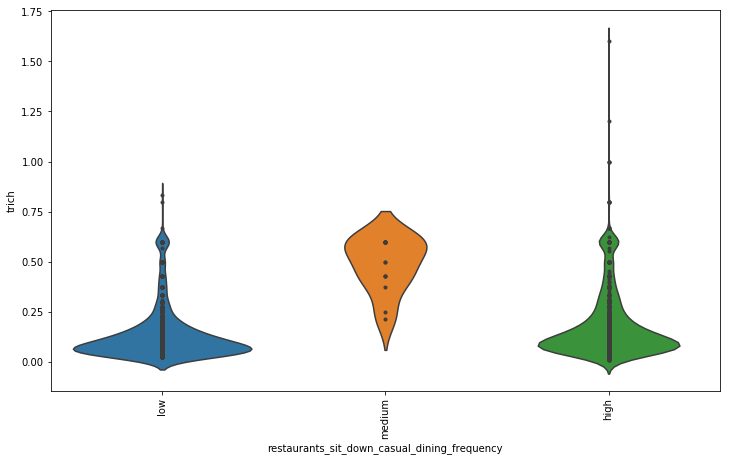

<Figure size 432x288 with 0 Axes>

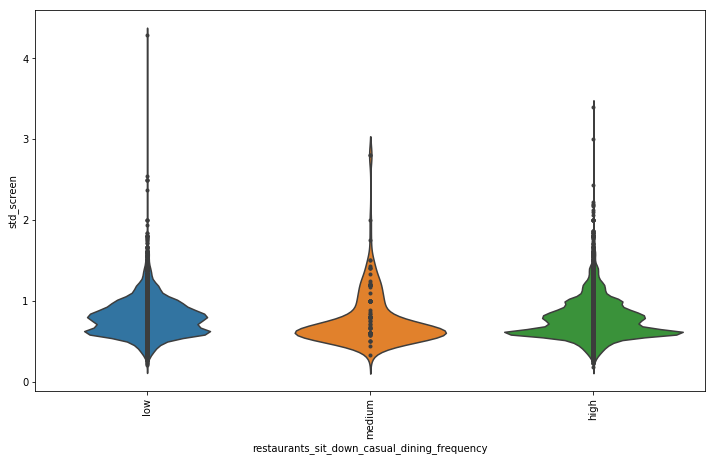

In [11]:
xaxis = 'restaurants_sit_down_casual_dining_frequency'
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich','std_screen']
for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold_educsort[xaxis], dfCAold_educsort[i], inner = "point", )
    plt.xticks(rotation='vertical')